* seaborn - barplot, boxplot, violinplot
* **seaborn PairGrid vs matplotlib - subplots**
* seaborn FacetGrid
    * **catplot 범주형 데이터 시각화 (kind: count, bar, box, boxen, violin)**
    * relplot 연속된 수치 데이터 시각화 (kind: scatter, line)
* pandas - value_counts, cross_tab, groupby, pivot_table
  
<img src="https://seaborn.pydata.org/_images/function_overview_8_0.png">

* seaborn 에 대해 좀 더 알고 싶다면 다음의 튜토리얼을 참고해 보세요.
* [User guide and tutorial — seaborn documentation](https://seaborn.pydata.org/tutorial.html)

## 상관 분석

상관 분석(相關 分析, Correlation analysis) 또는 '상관관계' 또는 '상관'은 확률론과 통계학에서 두 변수간에 어떤 선형적 또는 비선형적 관계를 갖고 있는지를 분석하는 방법이다. 두 변수는 서로 독립적인 관계이거나 상관된 관계일 수 있으며 이때 두 변수간의 관계의 강도를 상관관계(Correlation, Correlation coefficient)라 한다. 상관분석에서는 상관관계의 정도를 나타내는 단위로 모상관계수로 ρ를 사용하며 표본 상관 계수로 r 을 사용한다.

상관관계의 정도를 파악하는 상관 계수(相關係數, Correlation coefficient)는 두 변수간의 연관된 정도를 나타낼 뿐 인과관계를 설명하는 것은 아니다. 두 변수간에 원인과 결과의 인과관계가 있는지에 대한 것은 회귀분석을 통해 인과관계의 방향, 정도와 수학적 모델을 확인해 볼 수 있다.

* 출처 : https://ko.wikipedia.org/wiki/%EC%83%81%EA%B4%80_%EB%B6%84%EC%84%9D

### 피어슨 상관계수

* r 값은 X 와 Y 가 완전히 동일하면 +1, 전혀 다르면 0, 반대방향으로 완전히 동일 하면 –1 을 가진다. 
* 결정계수(coefficient of determination)는 r^2 로 계산하며 이것은 X 로부터 Y 를 예측할 수 있는 정도를 의미한다.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/800px-Correlation_examples2.svg.png" width="500">

```
일반적으로
r이 -1.0과 -0.7 사이이면, 강한 음적 선형관계,
r이 -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계,
r이 -0.3과 -0.1 사이이면, 약한 음적 선형관계,
r이 -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계,
r이 +0.1과 +0.3 사이이면, 약한 양적 선형관계,
r이 +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계,
r이 +0.7과 +1.0 사이이면, 강한 양적 선형관계
```

<img src="https://upload.wikimedia.org/wikipedia/commons/3/34/Correlation_coefficient.png" width=500>

* 출처 :  https://ko.wikipedia.org/wiki/%EC%83%81%EA%B4%80_%EB%B6%84%EC%84%9D#%ED%94%BC%EC%96%B4%EC%8A%A8_%EC%83%81%EA%B4%80_%EA%B3%84%EC%88%98




In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['font.family'] = 'Avenir'

# Seaborn의 내장된 penguin 데이터셋 불러오기
penguins = sns.load_dataset('penguins')
penguins.shape

(344, 7)

* species: 펭귄의 종을 나타냅니다.
* island: 펭귄이 발견된 섬의 이름을 나타냅니다.
* bill_length_mm: 부리의 길이를 밀리미터 단위로 나타냅니다.
* bill_depth_mm: 부리의 깊이를 밀리미터 단위로 나타냅니다.
* flipper_length_mm: 플리퍼(날개)의 길이를 밀리미터 단위로 나타냅니다.
* body_mass_g: 펭귄의 몸무게를 그램 단위로 나타냅니다.
* sex: 펭귄의 성별을 나타냅니다. (Male: 수컷, Female: 암컷)

In [3]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [4]:
penguins.iloc[:5]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [5]:
# 전체 평균 체질량
penguins['body_mass_g'].mean()

4201.754385964912

In [6]:
# 데이터에서 특정 변수를 선택하여 심슨의 역설을 보여주는 예시 생성
# 예: 섬(island)에 따른 체질량(body_mass_g)의 평균
penguins.groupby('island')['body_mass_g'].mean()

island
Biscoe       4716.017964
Dream        3712.903226
Torgersen    3706.372549
Name: body_mass_g, dtype: float64

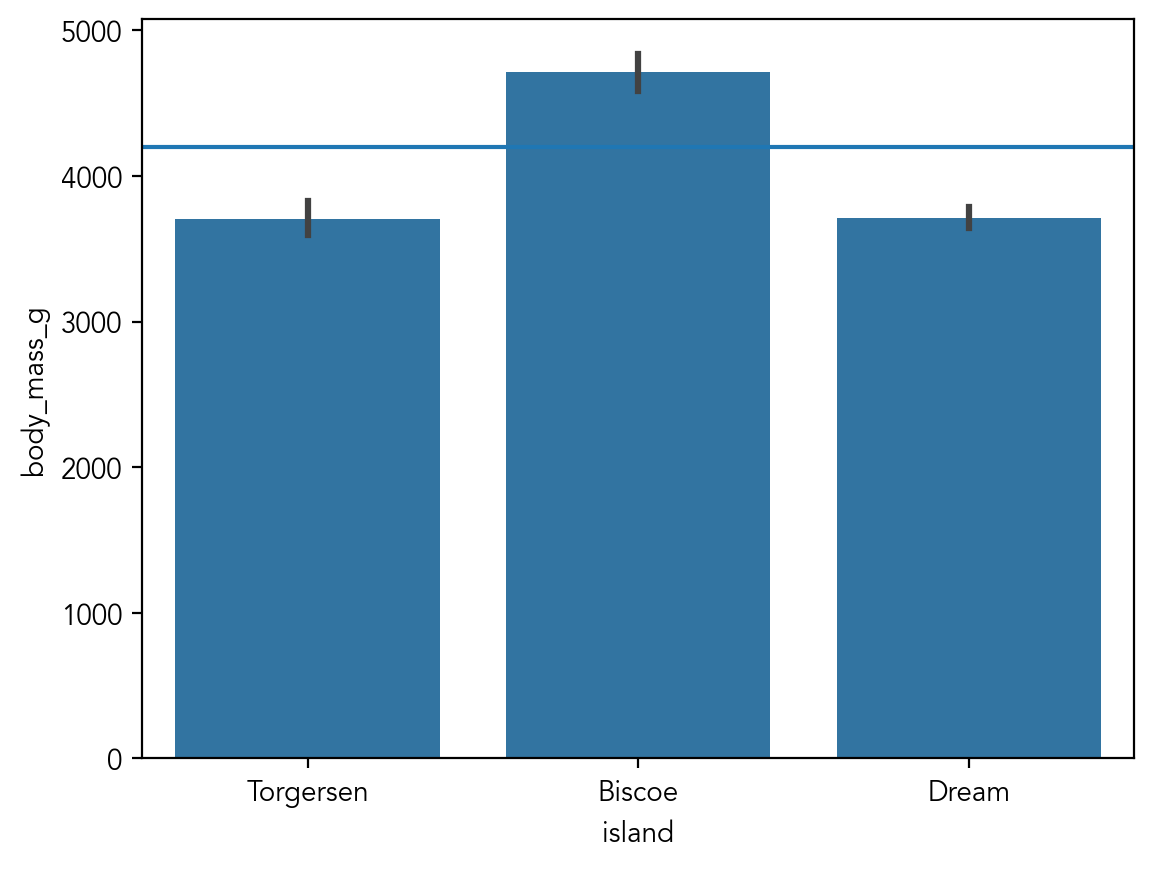

In [7]:
# 섬별 평균 체질량 시각화
# sns.barplot
sns.barplot(data = penguins, x = 'island', y = 'body_mass_g')
plt.axhline(penguins['body_mass_g'].mean())

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

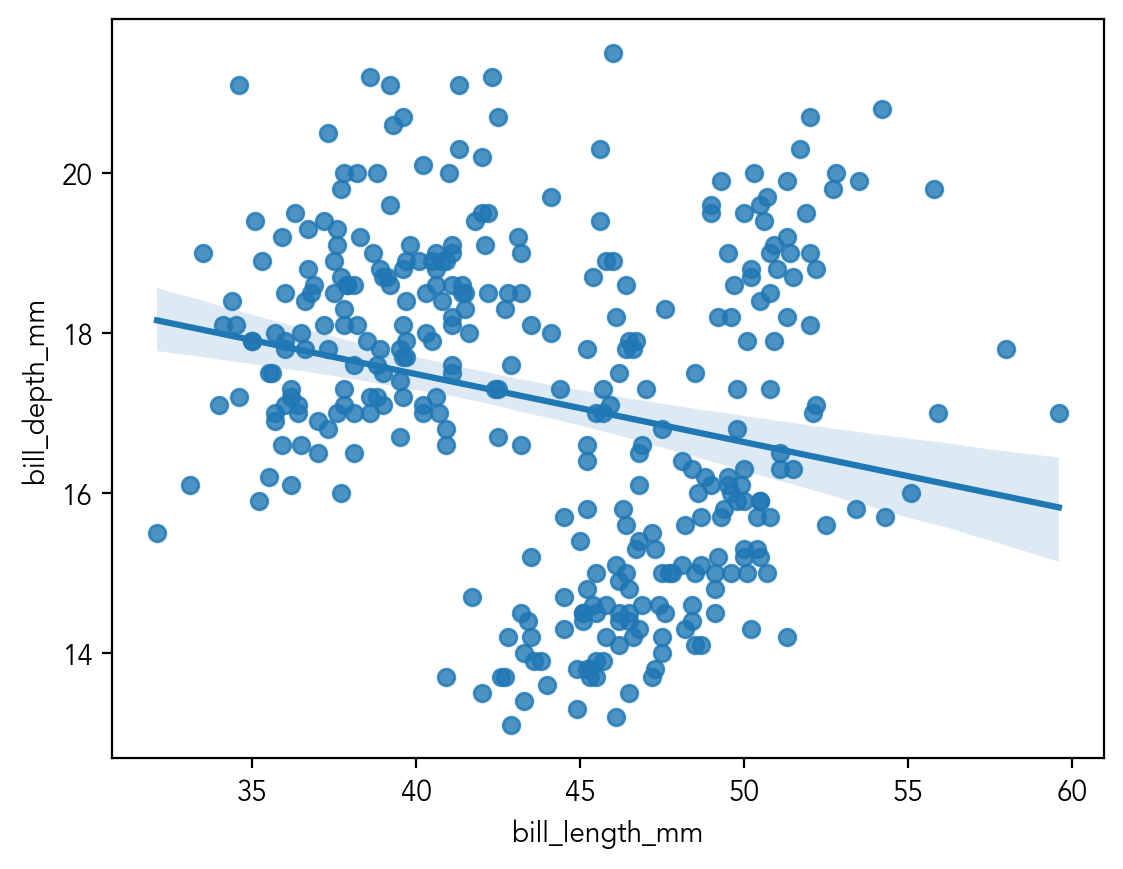

In [8]:
# 전체 변수 시각화
# sns.regplot
sns.regplot(data = penguins, x = 'bill_length_mm', y = 'bill_depth_mm')

In [10]:
# 전체 변수와 개별 변수를 합쳐서 시각화 하기
species_all = penguins.copy()
species_all["species"] = "all"
df_all = pd.concat([species_all, penguins])
df_all.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,all,Torgersen,39.1,18.7,181.0,3750.0,Male
1,all,Torgersen,39.5,17.4,186.0,3800.0,Female
2,all,Torgersen,40.3,18.0,195.0,3250.0,Female
3,all,Torgersen,NaN,NaN,NaN,NaN,NaN
4,all,Torgersen,36.7,19.3,193.0,3450.0,Female


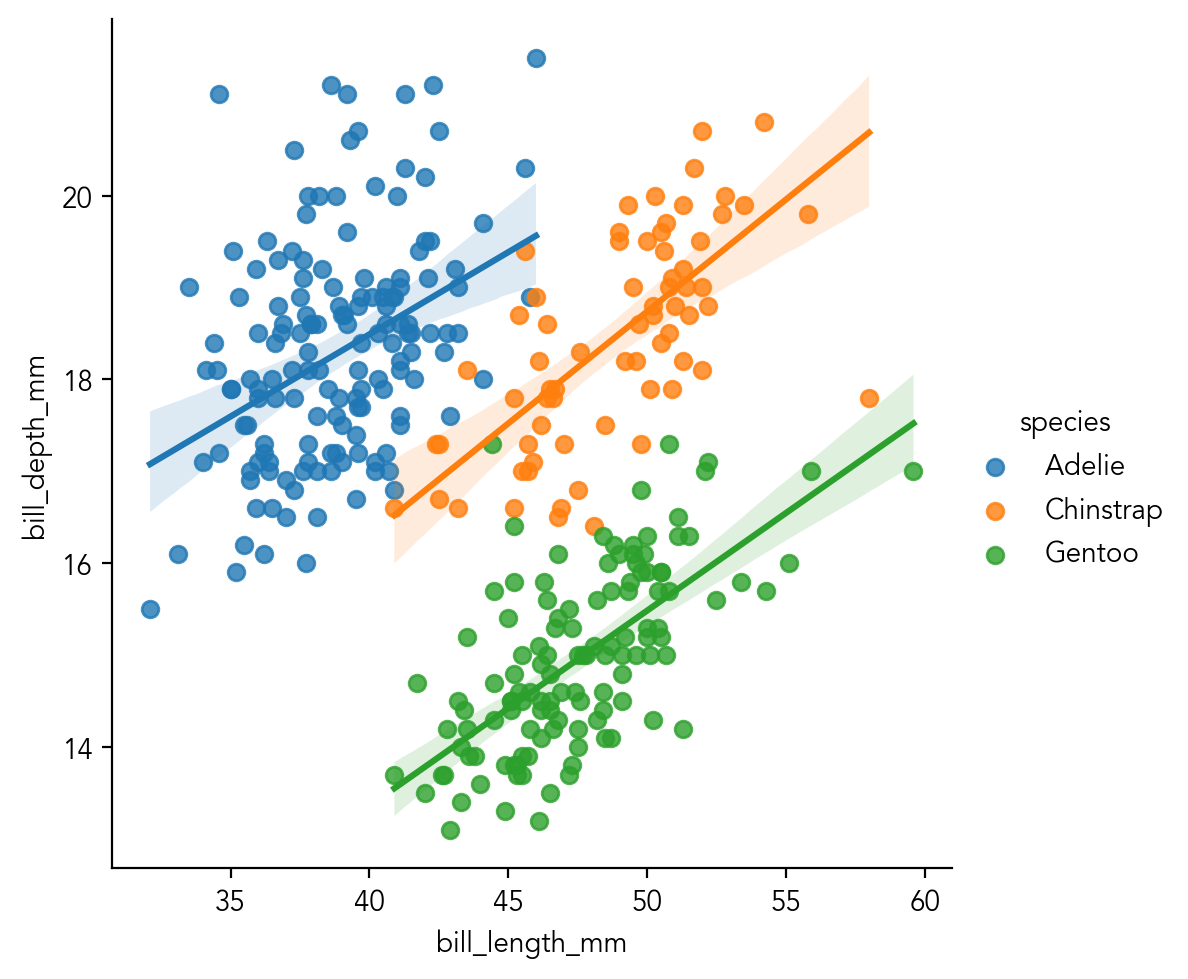

In [12]:
# 개별 변수의 회귀선 시각화
# sns.lmplot
sns.lmplot(data = penguins, x = 'bill_length_mm', y = 'bill_depth_mm', hue = 'species', robust = True)

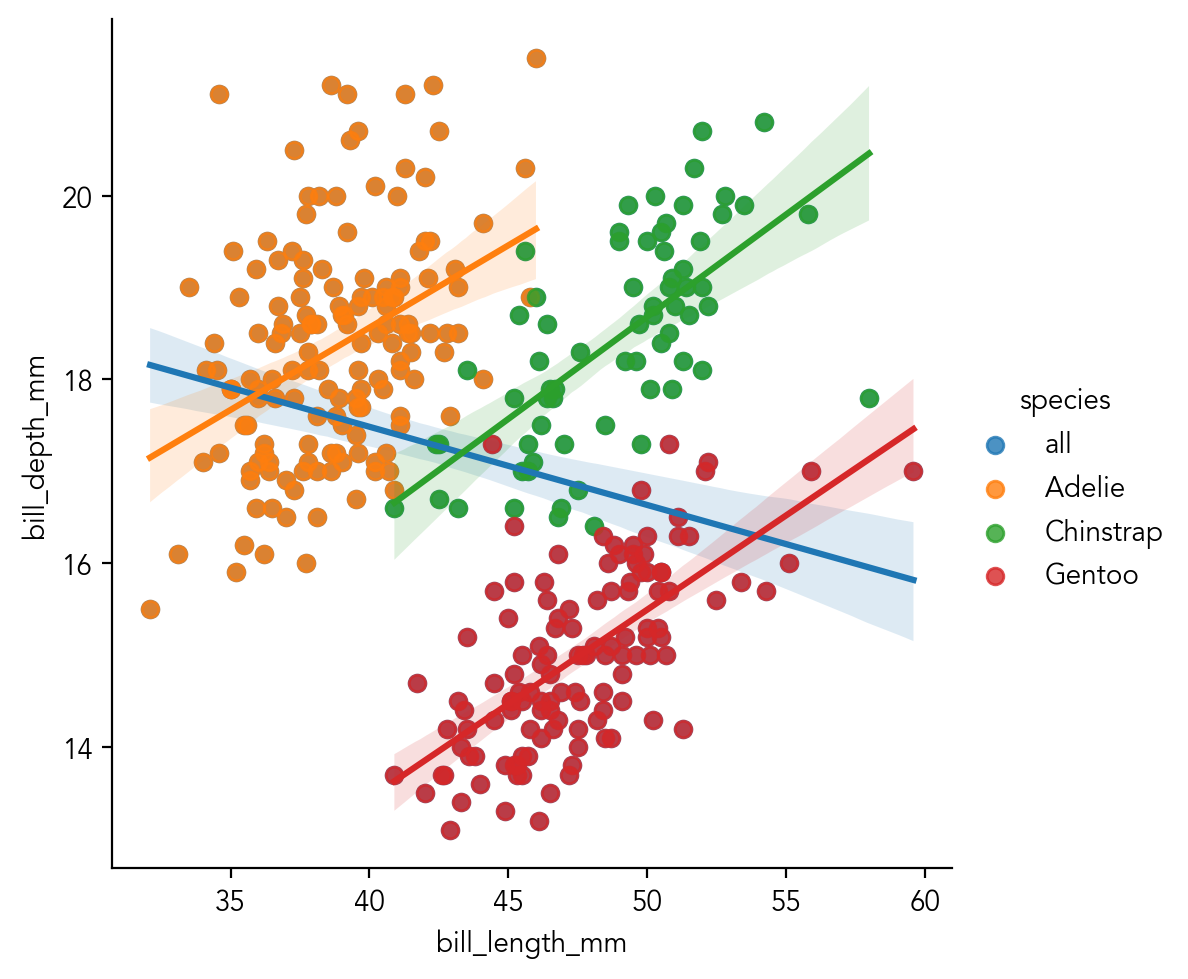

In [11]:
sns.lmplot(data = df_all, x = 'bill_length_mm', y = 'bill_depth_mm', hue = 'species')

### 상관계수 구하기

penguins 데이터셋의 두 변수인 "bill_length_mm" (부리의 길이)과 "bill_depth_mm" (부리의 깊이) 사이의 상관관계를 계산합니다.

* 1에 가까울수록: 두 변수 간에 강한 양의 선형 관계가 있음을 의미합니다. 즉, 한 변수가 증가할 때 다른 변수도 증가하는 경향이 있습니다.
* -1에 가까울수록: 두 변수 간에 강한 음의 선형 관계가 있음을 의미합니다. 즉, 한 변수가 증가할 때 다른 변수는 감소하는 경향이 있습니다.
* 0 근처의 값: 두 변수 간에 선형 관계가 거의 없거나 약함을 나타냅니다.

In [13]:
# method : {'pearson', 'kendall', 'spearman'} or callable
#     Method of correlation:
#     * pearson : standard correlation coefficient
#     * kendall : Kendall Tau correlation coefficient
#     * spearman : Spearman rank correlation
#     * callable: callable with input two 1d ndarrays
#         and returning a float. Note that the returned matrix from corr
#         will have 1 along the diagonals and will be symmetric
#         regardless of the callable's behavior.
penguins.corr?

Signature:
penguins.corr(
    method: 'CorrelationMethod' = 'pearson',
    min_periods: 'int' = 1,
    numeric_only: 'bool' = False,
) -> 'DataFrame'
Docstring:
Compute pairwise correlation of columns, excluding NA/null values.

Parameters
----------
method : {'pearson', 'kendall', 'spearman'} or callable
    Method of correlation:

    * pearson : standard correlation coefficient
    * kendall : Kendall Tau correlation coefficient
    * spearman : Spearman rank correlation
    * callable: callable with input two 1d ndarrays
        and returning a float. Note that the returned matrix from corr
        will have 1 along the diagonals and will be symmetric
        regardless of the callable's behavior.
min_periods : int, optional
    Minimum number of observations required per pair of columns
    to have a valid result. Currently only available for Pearson
    and Spearman correlation.
numeric_only : bool, default False
    Include only `float`, `int` or `boolean` data.

    .. versiona

In [15]:
penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


In [16]:
penguins.groupby('species')[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].corr()

bill_length_mm  bill_depth_mm  flipper_length_mm  \
species                                                                         
Adelie    bill_length_mm           1.000000       0.391492           0.325785   
          bill_depth_mm            0.391492       1.000000           0.307620   
          flipper_length_mm        0.325785       0.307620           1.000000   
          body_mass_g              0.548866       0.576138           0.468202   
Chinstrap bill_length_mm           1.000000       0.653536           0.471607   
          bill_depth_mm            0.653536       1.000000           0.580143   
          flipper_length_mm        0.471607       0.580143           1.000000   
          body_mass_g              0.513638       0.604498           0.641559   
Gentoo    bill_length_mm           1.000000       0.643384           0.661162   
          bill_depth_mm            0.643384       1.000000           0.706563   
          flipper_length_mm        0.661162       0.706563           1.000000   
          body_mass_g              0.669166       0.719085           0.702667   

                             body_mass_g  
species                                   
Adelie    bill_length_mm        0.548866  
          bill_depth_mm         0.576138  
          flipper_length_mm     0.468202  
          body_mass_g           1.000000  
Chinstrap bill_length_mm        0.513638  
          bill_depth_mm         0.604498  
          flipper_length_mm     0.641559  
          body_mass_g           1.000000  
Gentoo    bill_length_mm        0.669166  
          bill_depth_mm         0.719085  
          flipper_length_mm     0.702667  
          body_mass_g           1.000000

In [19]:
# 전체 변수의 상관 계수 구하기
corr = penguins.corr(numeric_only = True)
corr

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


In [30]:
import numpy as np
ones = np.ones_like(corr)
ones

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [32]:
ones = np.ones(corr.shape)
ones

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [33]:
np.triu(ones), np.tril(ones)

(array([[1., 1., 1., 1.],
        [0., 1., 1., 1.],
        [0., 0., 1., 1.],
        [0., 0., 0., 1.]]),
 array([[1., 0., 0., 0.],
        [1., 1., 0., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 1.]]))

<Axes: >

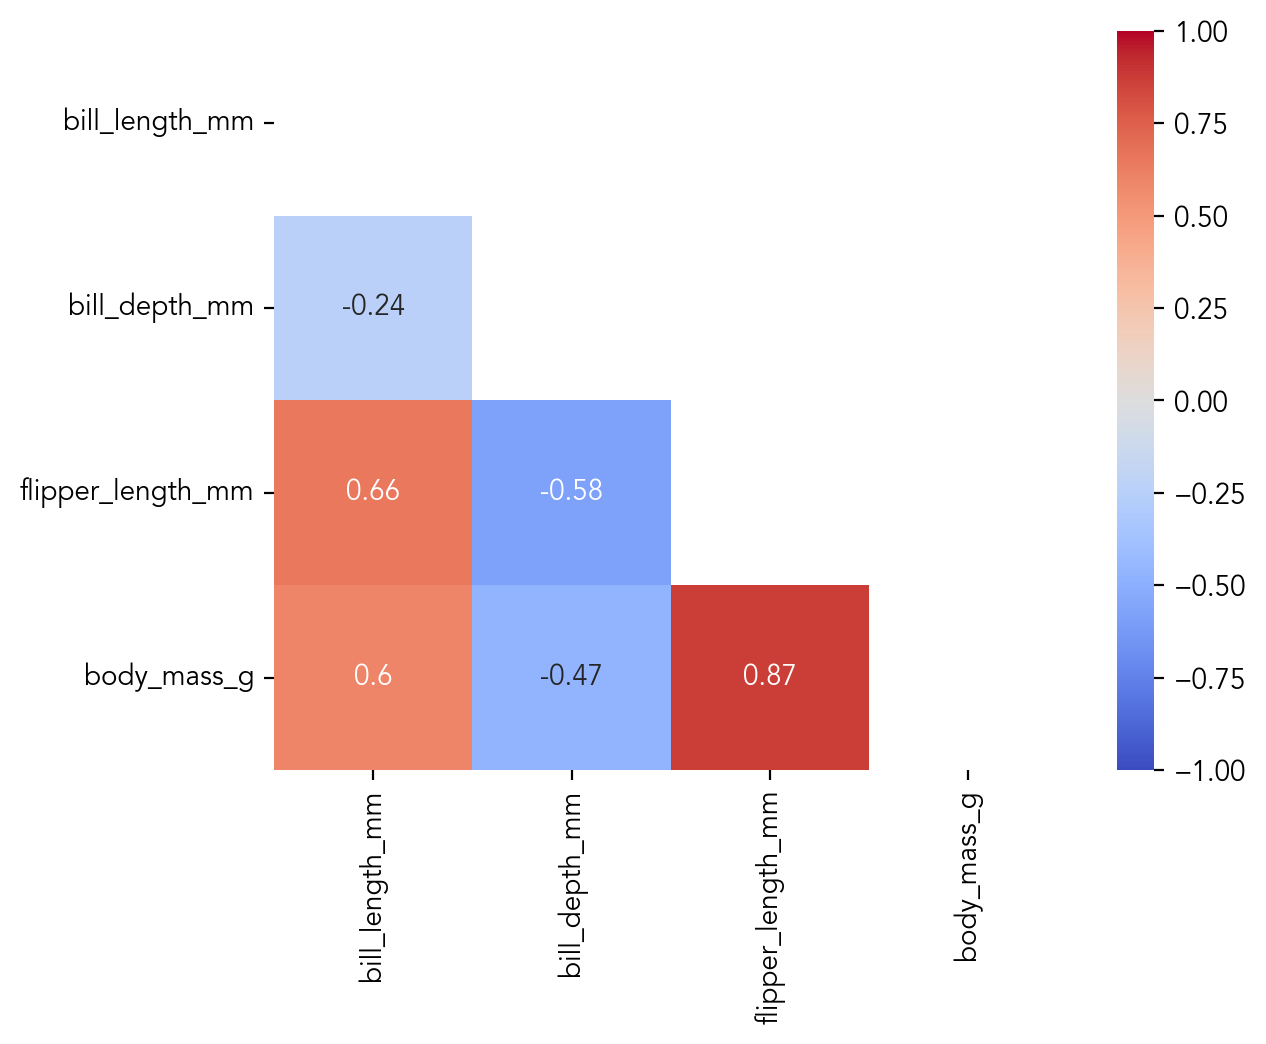

In [37]:

sns.heatmap(corr, annot = True, cmap = 'coolwarm', mask = np.triu(ones))

<Axes: >

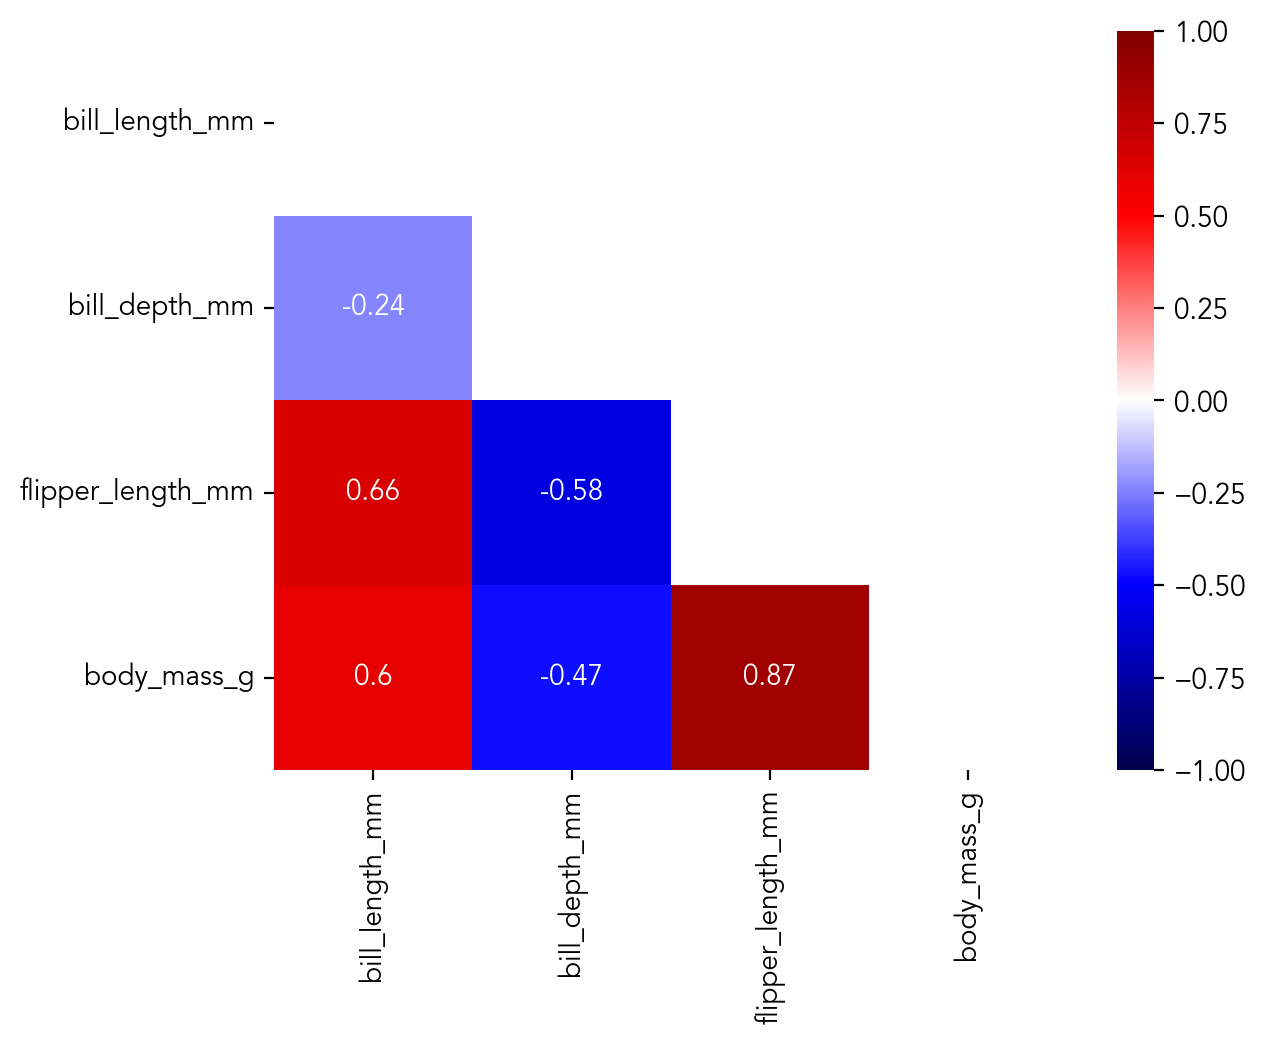

In [36]:
sns.heatmap(corr, annot = True, cmap = 'seismic', vmin = -1, vmax = 1, mask = np.triu(ones))

* 펭귄 종(species)에 따라 "bill_length_mm"과 "bill_depth_mm" 간의 상관 관계를 계산

In [39]:
# corr_species
corr_species = penguins.groupby('species')[['bill_length_mm', 'bill_depth_mm']].corr()
corr_species

bill_length_mm  bill_depth_mm
species                                                
Adelie    bill_length_mm        1.000000       0.391492
          bill_depth_mm         0.391492       1.000000
Chinstrap bill_length_mm        1.000000       0.653536
          bill_depth_mm         0.653536       1.000000
Gentoo    bill_length_mm        1.000000       0.643384
          bill_depth_mm         0.643384       1.000000

<Axes: ylabel='species-None'>

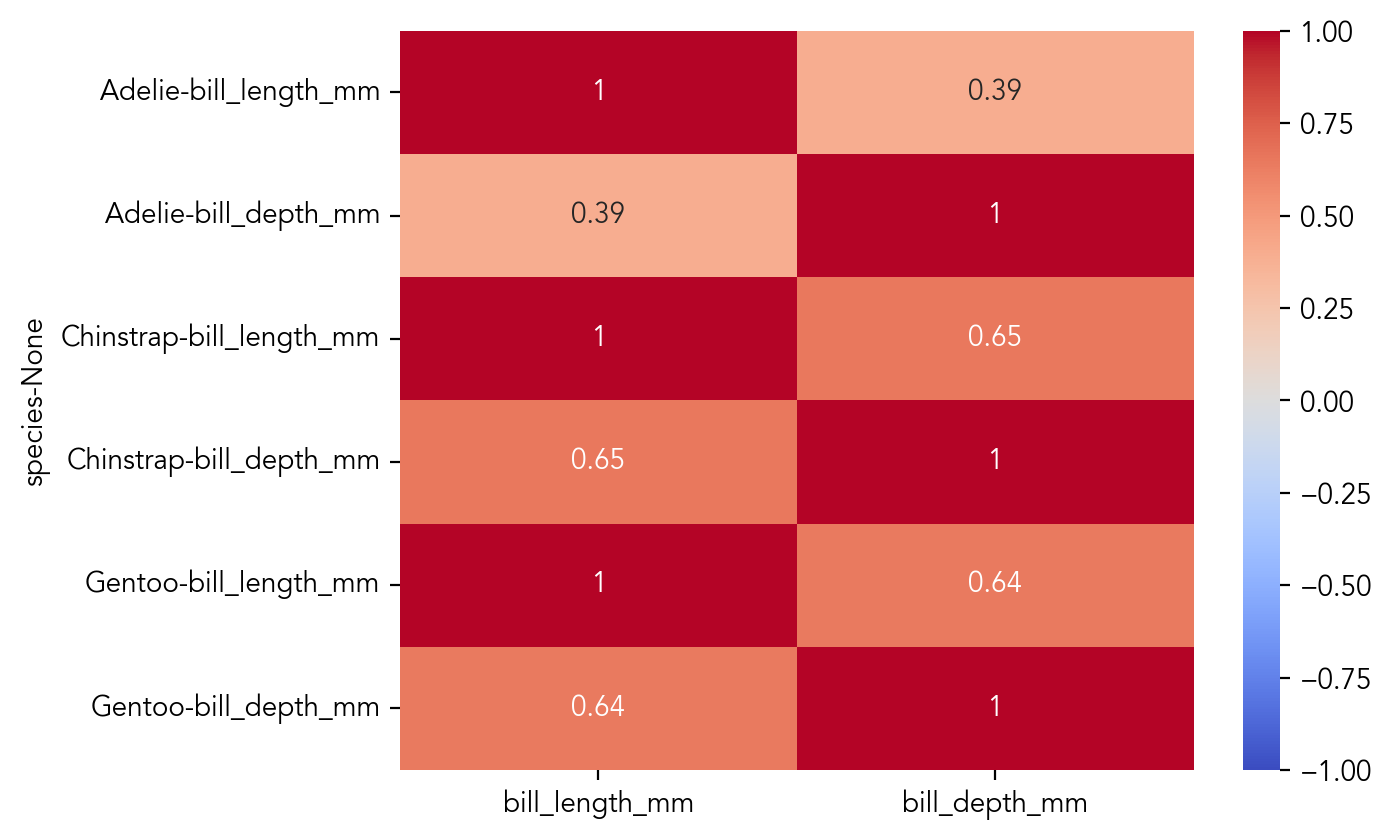

In [45]:
sns.heatmap(corr_species, annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1)

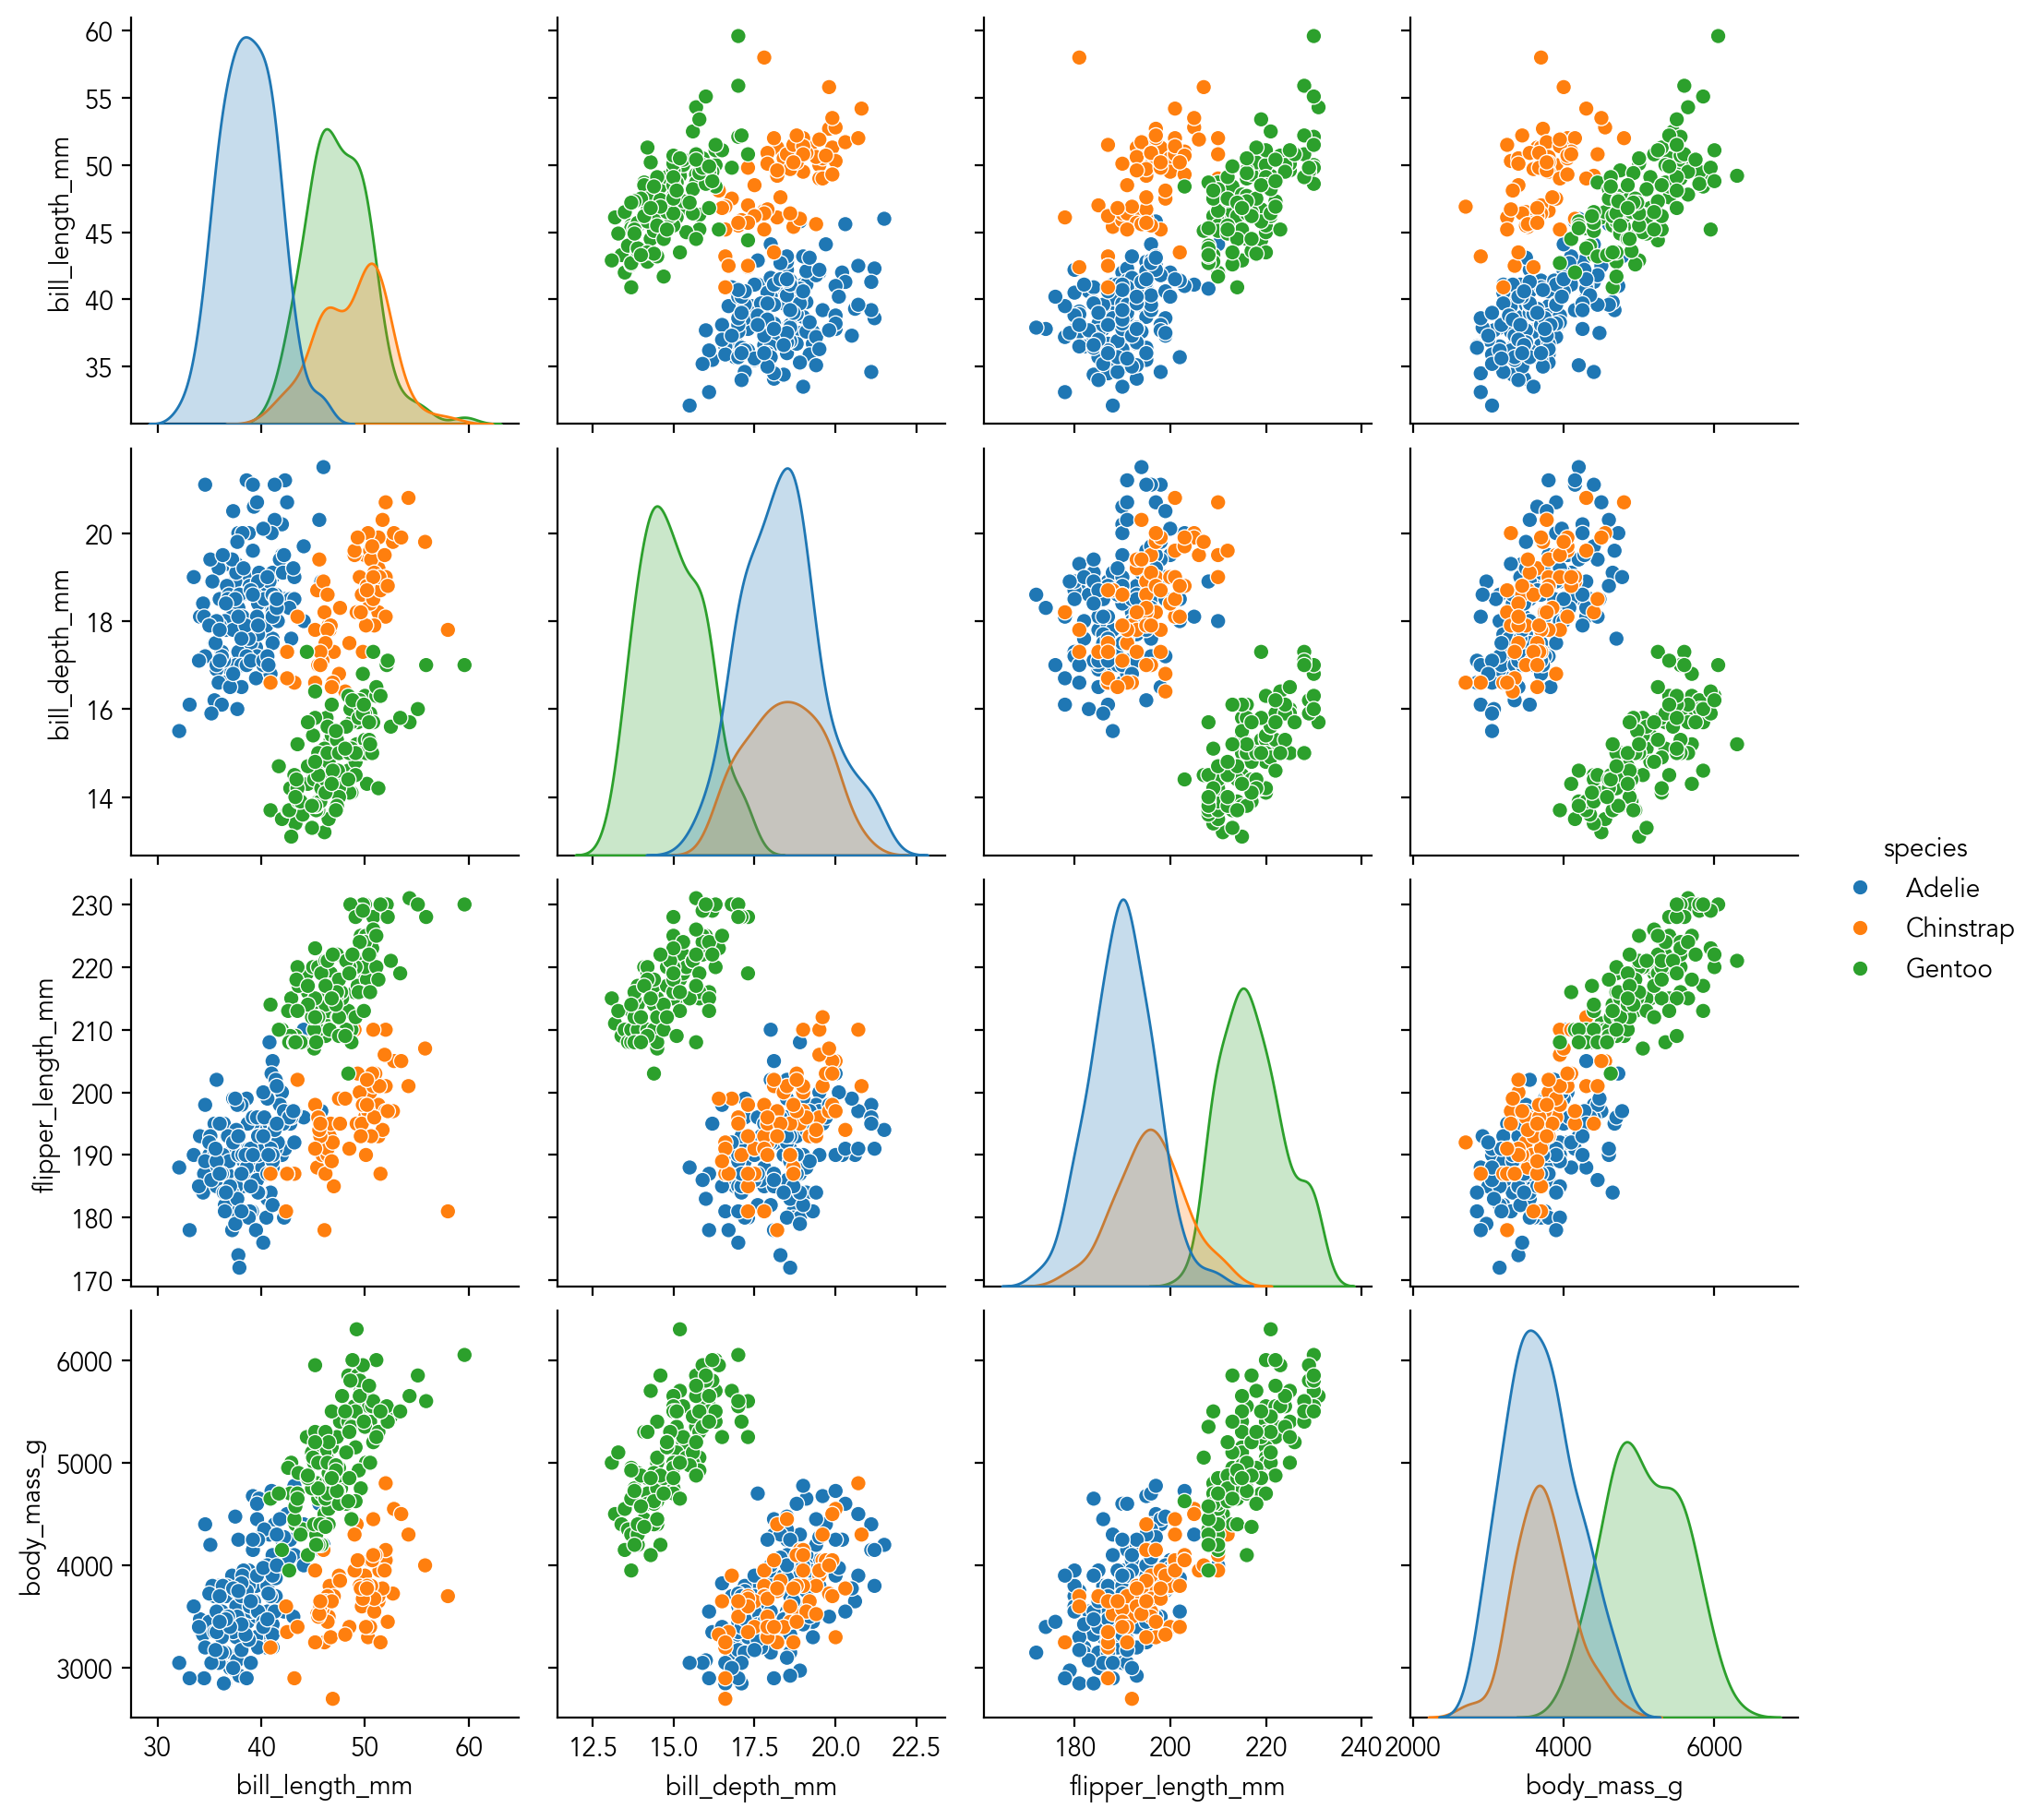

In [51]:
sns.pairplot(data = penguins, hue = 'species')

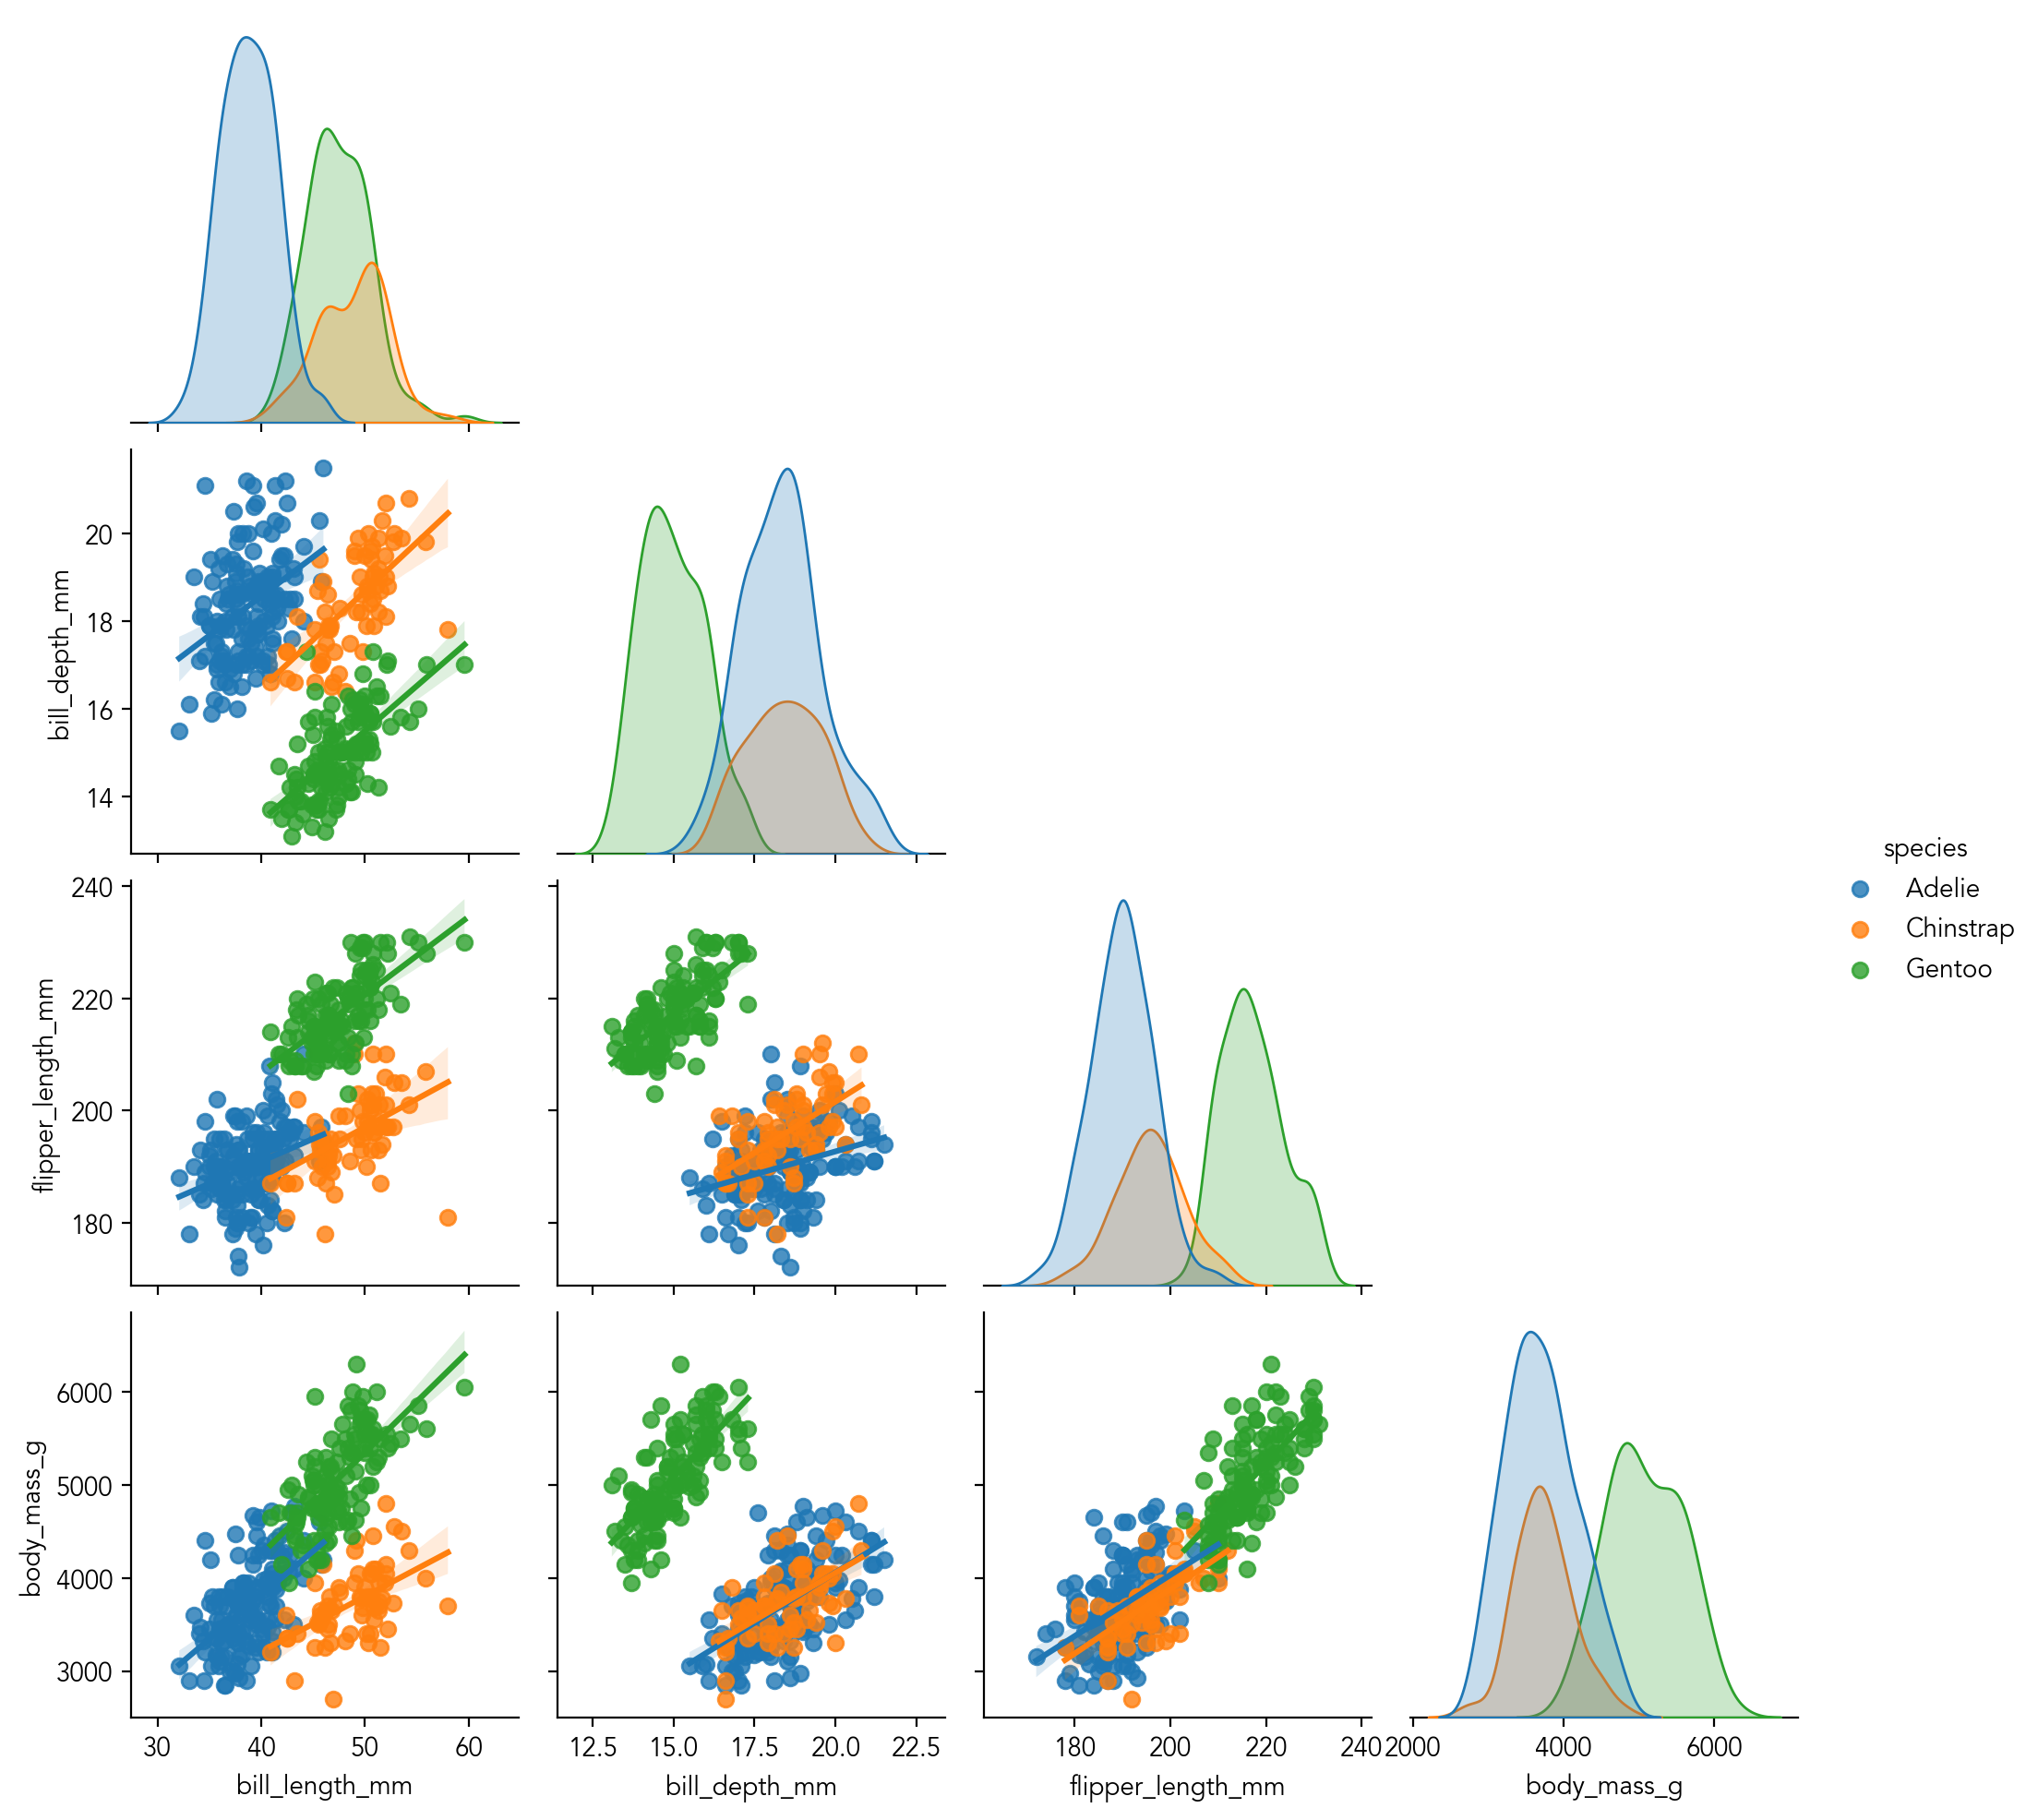

In [62]:
sns.pairplot(data = penguins, hue = 'species', kind = 'reg', corner = True)

In [52]:
sns.pairplot?

Signature:
sns.pairplot(
    data,
    *,
    hue=None,
    hue_order=None,
    palette=None,
    vars=None,
    x_vars=None,
    y_vars=None,
    kind='scatter',
    diag_kind='auto',
    markers=None,
    height=2.5,
    aspect=1,
    corner=False,
    dropna=False,
    plot_kws=None,
    diag_kws=None,
    grid_kws=None,
    size=None,
)
Docstring:
Plot pairwise relationships in a dataset.

By default, this function will create a grid of Axes such that each numeric
variable in ``data`` will by shared across the y-axes across a single row and
the x-axes across a single column. The diagonal plots are treated
differently: a univariate distribution plot is drawn to show the marginal
distribution of the data in each column.

It is also possible to show a subset of variables or plot different
variables on the rows and columns.

This is a high-level interface for :class:`PairGrid` that is intended to
make it easy to draw a few common styles. You should use :class:`PairGrid`
directly if you

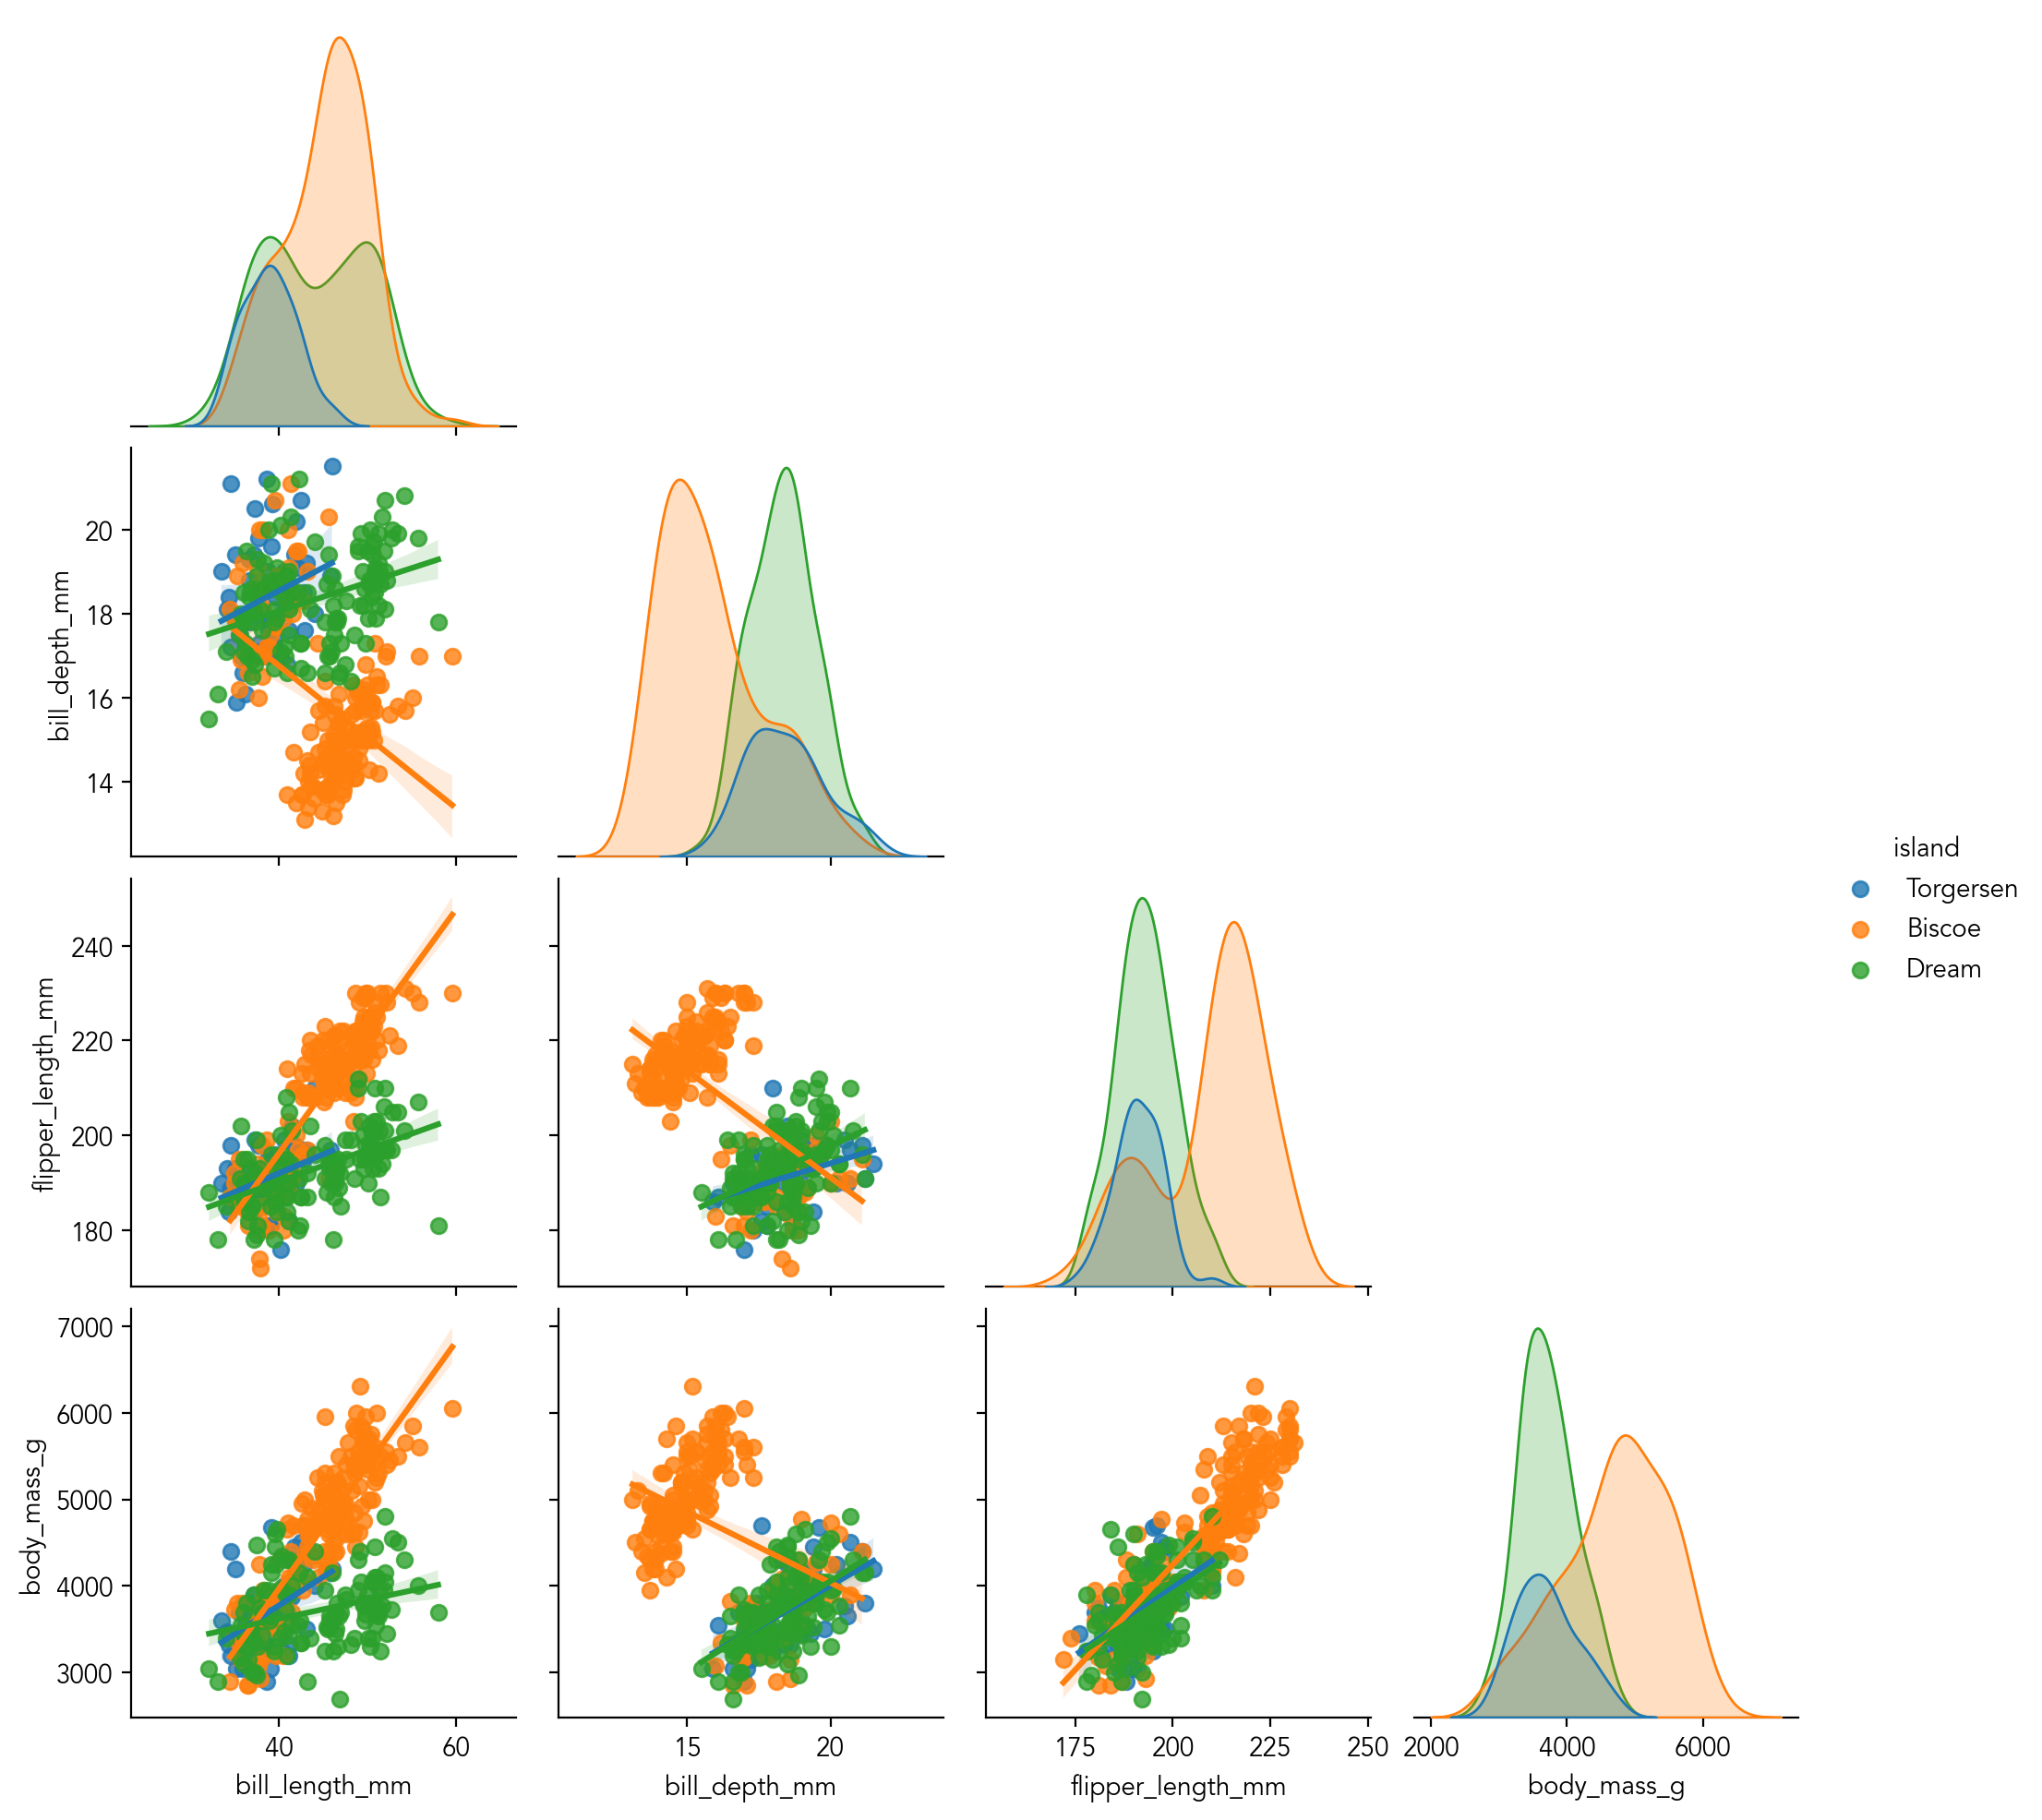

In [63]:
sns.pairplot(data = penguins, hue = 'island', kind = 'reg', corner=True)